In [1]:
__author__ = 'Stephanie Juneau <sjuneau@noao.edu>'
__version__ = '20190503'
__datasets__ = ['unwise_dr1']  # datasets used in this notebook; for available datasets, see cell "Available datasets in Data Lab" further below
__keywords__ = [''], # keywords relevant to this notebook, e.g. ['science case','dwarf galaxies'] Use only keywords from the master list: https://github.com/noaodatalab/notebooks-latest/blob/master/internal/keywords.txt

# unWISE

*Stephanie Juneau & NOAO Data Lab Team*

### Table of contents
* [Goals & notebook summary](#goals)
* [Disclaimer & Attribution](#attribution)
* [Imports & setup](#import)
* [Authentication](#auth)
* [First chapter](#chapter1)
* [Resources and references](#resources)

<a class="anchor" id="goals"></a>
# Goals
Use the unWISE catalog to study the infrared color-magnitude diagram of objects and compare with distributions of known objects.

# Summary

Color-magnitude diagram from unWISE to identify objects: galaxies, AGN, and stars.

<a class="anchor" id="attribution"></a>
# Disclaimer & attribution
If you use this notebook for your published science, please acknowledge the following:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, http://dx.doi.org/10.1117/12.2057445

* Data Lab disclaimer: http://datalab.noao.edu/disclaimers.php

# Introduction

Color-color diagram from unWISE to identify objects: galaxies, AGN, and stars.

<figure>
<img src="Figs/wright10_fig12.jpg", align="center", width=400>
<figcaption><b>Figure 1.</b> Figure from Wright et al (2010; their Figure 12).</figcaption>
</figure>



<a class="anchor" id="import"></a>
# Imports and setup

In [14]:
# std lib
from getpass import getpass

# 3rd party # remove imports that are not needed
import numpy as np
import pylab as plt
import matplotlib
%matplotlib inline

# Data Lab
from dl import authClient as ac, queryClient as qc, storeClient as sc, helpers
from dl.helpers.utils import convert

<a class="anchor" id="auth"></a>
# Authentication
Use this mini-section to authenticate the user, IF the notebook needs authentication (e.g. for saving files to VOSpace). If the notebook does not require authentication at all, remove this entire subsection.

In [3]:
#token = ac.login(input("Enter user name: (+ENTER) "),getpass("Enter password: (+ENTER) "))
#if not ac.isValidToken(token):
#    raise Exception('Token is not valid. Please check your usename/password and execute this cell again.')

# Learn about unWISE 'object' table
The command below will print the list of column names and descriptions.

In [4]:
print(qc.schema('unwise_dr1.object'))


Schema: unwise_dr1
 Table: object

     Column Name   Description
     -----------   -----------
            x_w1   W1 channel x coordinate (pix)
            x_w2   W2 channel x coordinate (pix)
            y_w1   W1 channel y coordinate (pix)
            y_w2   W2 channel y coordinate (pix)
         ra12_w1   Positions from individual-image catalogs
         ra12_w2   Positions from individual-image catalogs
        dec12_w1   Positions from individual-image catalogs
        dec12_w2   Positions from individual-image catalogs
              ra   W1 position, if available; otherwise W2 position
             dec   W1 position, if available; otherwise W2 position
            glon   Galactic Longitude
            glat   Galactic Latitude
            elon   Ecliptic Longitude
            elat   Ecliptic Latitude
         flux_w1   W1 flux (Vega nMgy)
         flux_w2   W2 flux (Vega nMgy)
           dx_w1   uncertainty in W1 x position
           dx_w2   uncertainty in W2 x position
      

### NOTE: the tbl_stat table (below) is not yet ready to use for unwise_dr1.object. SJ requested it to be added on May 28, 2019. Should be implemented soon.

Below is an query from the *GettingStartedWithDataLab* notebook to quickly retrieve useful stats from the **tbl_stat** table.

In [16]:
#Retrieve useful stats, quickly
query="SELECT * FROM tbl_stat WHERE schema='unwise_dr1' and tbl_name='object'"

In [17]:
%time
info = qc.query(sql=query) # by default the result is a CSV formatted string

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.58 µs


In [18]:
print(info)

schema,tbl_name,nrows,ncols,nindex,table_size,indexes_size,total_size



<a class="anchor" id="chapter1"></a>
# Chapter 1 -- Query the unWISE 'object' table

In [5]:
# WISE pixel size: 2.75" / pixel => FWHM ~ 6" for point-sources

In [46]:
query = """
        SELECT mag_w1_vg as w1, mag_w2_vg as w2, w1_w2_vg as w1_w2, 
               ra, dec, glon, glat, fwhm_w1, fwhm_w2
        FROM unwise_dr1.object
        WHERE (mag_w1_vg<20 and mag_w2_vg<20 and glat>40)
        LIMIT 500000"""
print(query)


        SELECT mag_w1_vg as w1, mag_w2_vg as w2, w1_w2_vg as w1_w2, 
               ra, dec, glon, glat, fwhm_w1, fwhm_w2
        FROM unwise_dr1.object
        WHERE (mag_w1_vg<20 and mag_w2_vg<20 and glat>40)
        LIMIT 500000


In [47]:
%%time
# This query should takes a while (~2 min with limit 500000)
try:
    result = qc.query(sql=query) # by default the result is a CSV formatted string
except Exception as e:
    print(e.message)

Error: Query timeout at 120 sec
CPU times: user 24 ms, sys: 6 ms, total: 30 ms
Wall time: 2min


In [48]:
# Convert the result to a Pandas Dataframe
df = convert(result,'pandas')

In [49]:
# Print a few rows of the dataframe
print(df[:5])

        w1       w2     w1_w2         ra        dec        glon       glat  \
0  16.5184  16.3226  0.195822  75.867234 -49.869013  256.539529 -37.516254   
1  15.8292  15.2657  0.563533  75.852639 -49.868381  256.538958 -37.525671   
2  18.3458  17.4472  0.898661  75.867254 -49.863515  256.532599 -37.516344   
3  17.7069  16.6800  1.026870  75.866743 -49.859235  256.527212 -37.516753   
4  17.0277  16.0416  0.986053  75.891002 -49.854813  256.521273 -37.501198   

   fwhm_w1  fwhm_w2  
0  2.63966  2.86506  
1  2.63866  2.86131  
2  2.64078  2.86500  
3  2.63766  2.86184  
4  2.63955  2.86020  


# Chapter 2 -- Color & Magnitude Distributions

For reference, we show the distributions of *W1-W2* color and *W1* magnitude from the cross-matched AllWISE-SDSS DR10 sample from the work of Kurcz et al (2016). Below, we will create distributions from our query results.

## Distributions from AllWISE-SDSS DR10 Sample

<figure>
<img src="Figs/Kurcz2016_fig2.png", align="center", width=700>
<figcaption><b>Figure 1.</b> Figure from Kurcz et al (2016; their Figure 2).</figcaption>
</figure>

<figure>
<img src="Figs/Kurcz2016_fig3.png", align="center", width=700>
<figcaption><b>Figure 2.</b> Figure from Kurcz et al (2016; their Figure 3).</figcaption>
</figure>


## Distributions for unWISE sample

In [69]:
magthres = 16.

faint_w1 = df['w1']>magthres
bright_w1 = df['w1']<=magthres

faint_w2 = df['w2']>magthres
bright_w2 = df['w2']<=magthres

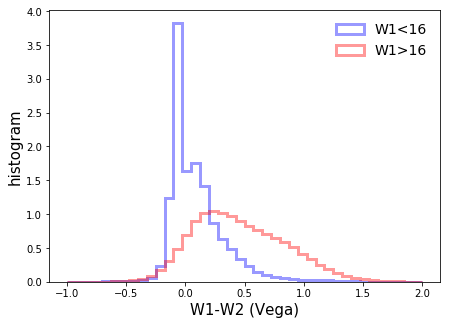

In [70]:
#W1-W2 Color distribution
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.hist(df['w1_w2'][bright_w1],bins=40,density=True,range=(-1,2),histtype='step',lw=3,color='Blue',alpha=0.4,label='W1<16')
ax.hist(df['w1_w2'][faint_w1],bins=40,density=True,range=(-1,2),histtype='step',lw=3,color='Red',alpha=0.4,label='W1>16')

ax.set_xlabel('W1-W2 (Vega)',fontsize=15)
ax.set_ylabel('histogram',fontsize=15)
ax.legend(loc='upper right',frameon=False,fontsize=14)

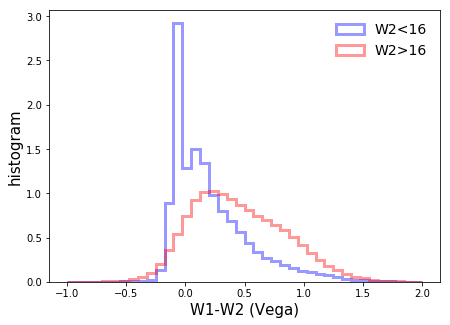

In [71]:
#W1-W2 Color distribution
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.hist(df['w1_w2'][bright_w2],bins=40,density=True,range=(-1,2),histtype='step',lw=3,color='Blue',alpha=0.4,label='W2<16')
ax.hist(df['w1_w2'][faint_w2],bins=40,density=True,range=(-1,2),histtype='step',lw=3,color='Red',alpha=0.4,label='W2>16')

ax.set_xlabel('W1-W2 (Vega)',fontsize=15)
ax.set_ylabel('histogram',fontsize=15)
ax.legend(loc='upper right',frameon=False,fontsize=14)

# Chapter 3 -- Color-Magnitude Diagrams of unWISE sources

### Scatter Plot of Color-Magnitude Diagram 

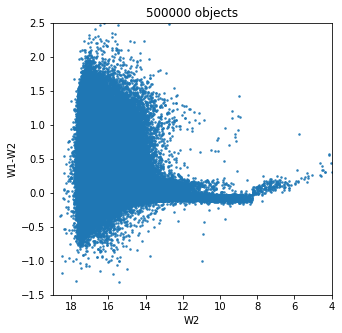

In [53]:
fig, ax = plt.subplots(figsize=(5,5))
x = df['w2']
y = df['w1_w2']
ax.scatter(x,y,marker='.',s=10, alpha=0.8)
ax.set_xlabel('W2')
ax.set_ylabel('W1-W2')
ax.set_xlim((19,4))
ax.set_ylim((-1.5,2.5))
title = ax.set_title('{:d} objects'.format(len(df)))

### 2D Histogram of Color-Magnitude Diagram 

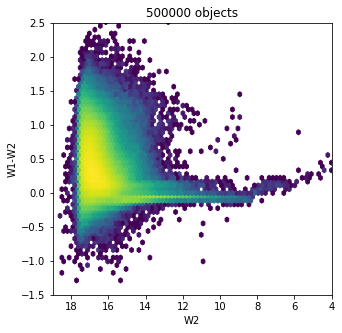

In [58]:
fig, ax = plt.subplots(figsize=(5,5))
x = df['w2']
y = df['w1_w2']
ax.hexbin(x,y,bins='log', cmap=plt.cm.viridis,
               mincnt=1)
ax.set_xlabel('W2')
ax.set_ylabel('W1-W2')
ax.set_xlim((19,4))
ax.set_ylim((-1.5,2.5))
title = ax.set_title('{:d} objects'.format(len(df)))

### Splitting into faint/bright bins in W1 (top) and W2 (bottom)

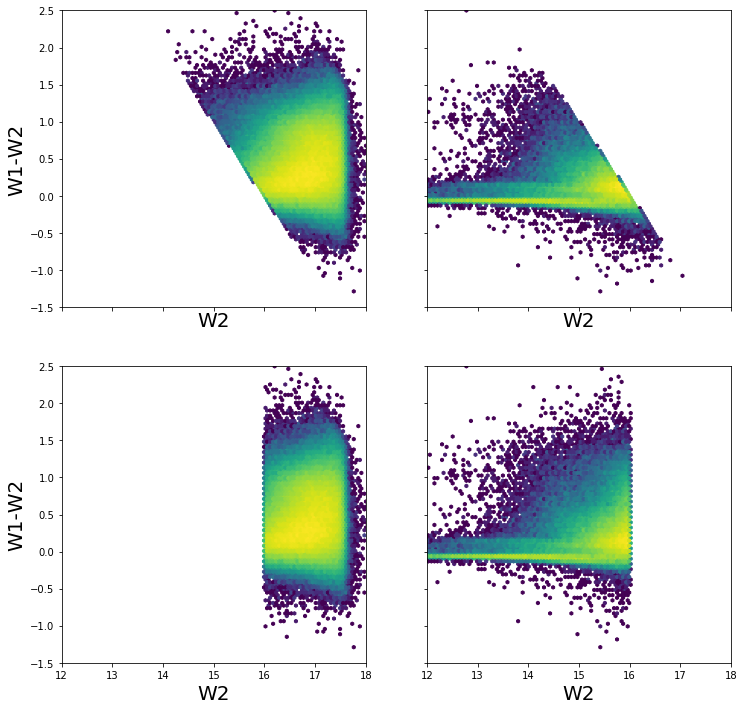

In [60]:
# 2D-histogram of objects
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True, sharex=True) 
axes = axes.flatten()

ax = axes[0]
im1 = ax.hexbin(x[faint_w1], y[faint_w1], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(12, 18, -1.5, 2.5))
ax.set_xlabel('W2',fontsize=20)
ax.set_ylabel('W1-W2',fontsize=20)
#ax.text(0.1,.05,'SF',transform=ax.transAxes,fontsize=20,color='red',backgroundcolor='white')

# implement AGN dividing line in Vega mags
#ax.plot(w2_dummy,w1w2_R75,color='r')
#ax.plot(w2_dummy,w1w2_R90,color='orange')

ax = axes[1]
im1 = ax.hexbin(x[bright_w1],y[bright_w1], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(12, 18, -1.5, 2.5))
ax.set_xlabel('W2',fontsize=20)
#ax.text(0.1,.05,'Comp',transform=ax.transAxes,fontsize=20,color='red',backgroundcolor='white')

ax = axes[2]
im1 = ax.hexbin(x[faint_w2],y[faint_w2], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(12, 18, -1.5, 2.5))
ax.set_xlabel('W2',fontsize=20)
ax.set_ylabel('W1-W2',fontsize=20)
#ax.text(0.1,.05,'Seyfert',transform=ax.transAxes,fontsize=20,color='red',backgroundcolor='white')

ax = axes[3]
im1 = ax.hexbin(x[bright_w2], y[bright_w2], bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(12, 18, -1.5, 2.5))
ax.set_xlabel('W2',fontsize=20)
#ax.text(0.1,.05,'LINER',transform=ax.transAxes,fontsize=20,color='red',backgroundcolor='white')


ax.set_autoscalex_on(False)
ax.xlim = [12,18]
ax.ylim = [-1.5,2.5]
plt.axis([12, 18, -1.5, 2.5])

plt.show()

# Size Distribution

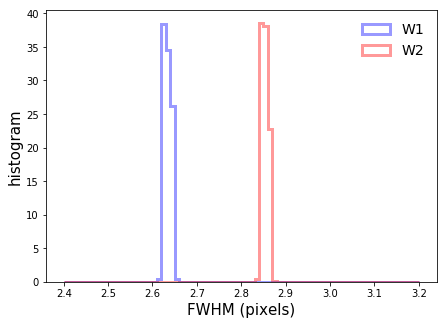

In [62]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.hist(df['fwhm_w1'],bins=80,density=True,range=(2.4,3.2),histtype='step',lw=3,color='Blue',alpha=0.4,label='W1')
ax.hist(df['fwhm_w2'],bins=80,density=True,range=(2.4,3.2),histtype='step',lw=3,color='Red',alpha=0.4,label='W2')

ax.set_xlabel('FWHM (pixels)',fontsize=15)
ax.set_ylabel('histogram',fontsize=15)
ax.legend(loc='upper right',frameon=False,fontsize=14)

From the figure above, most sources are unresolved with FWHM likely corresponding to a PSF.

<a class="anchor" id="resources"></a>
# Resources and references

Wright et al (2010) ""

Schlafly et al (2019) "title". Astrophysical Journal, 263, 835: http://adsabs.harvard.edu/doi/10.1086/160554
